In [1]:
import ete3
import pandas as pd
import gzip
import statistics
import matplotlib.pyplot as plt
import matplotlib

In [16]:
def get_species_tag(node):
    return node.split("_")[1]

In [101]:
trees = gzip.open('../../01_get_trees/outputs/0005_best_trees.txt.gz', 'rt').read()
tree = trees.split('\n', 1)[0].split('\t')[3]
seed_id = trees.split('\n', 1)[0].split('\t')[0]
t = ete3.PhyloTree(tree, sp_naming_function=get_species_tag)
t.set_outgroup(t.get_midpoint_outgroup())
t.get_descendant_evol_events()

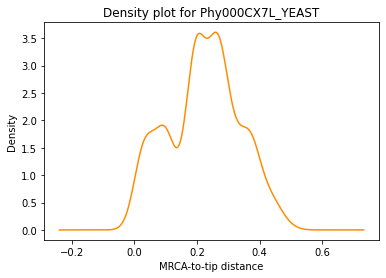

In [105]:
ln = t.get_leaf_names()

odl = list()
distl = list()
for seq_from in ln:
    for seq_to in ln:
        if seq_from != seq_to:
            st = t.get_common_ancestor(seq_from, seq_to)
            fromd = st.get_distance(seq_from)
            tod = st.get_distance(seq_to)
            if (fromd != t.get_distance(seq_from) and
                  tod != t.get_distance(seq_to) and st.evoltype == 'S'):
                od = {'from_sp': get_species_tag(seq_from),
                      'to_sp': get_species_tag(seq_to),
                      'dist_from': fromd,
                      'dist_to': tod}
                odl.append(od)
                distl.extend([fromd, tod])
dplt = pd.DataFrame(distl).plot.density(color='darkorange', legend=False)
plt.title('Density plot for %s' % seed_id)
plt.xlabel('MRCA-to-tip distance')
plt.savefig('../outputs/dens_plots/dens_%s.pdf' % seed_id)

In [76]:
odf = pd.DataFrame(odl)
odf = odf.groupby(['from_sp', 'to_sp']).agg(statistics.mean)

In [77]:
distl.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()

AttributeError: 'list' object has no attribute 'plot'

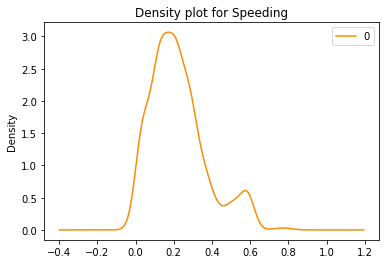

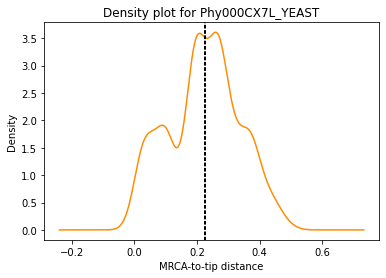

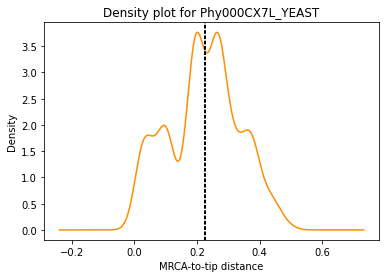

In [145]:
ln = t.get_leaf_names()
pdf = matplotlib.backends.backend_pdf.PdfPages('output.pdf')
odl = list()
distl = list()
for i in range(2):
    for seq_from in ln:
        for seq_to in ln:
            if seq_from != seq_to:
                st = t.get_common_ancestor(seq_from, seq_to)
                fromd = st.get_distance(seq_from)
                tod = st.get_distance(seq_to)
                if (fromd != t.get_distance(seq_from) and
                      tod != t.get_distance(seq_to) and st.evoltype == 'S'):
                    od = {'from_sp': get_species_tag(seq_from),
                          'to_sp': get_species_tag(seq_to),
                          'dist_from': fromd,
                          'dist_to': tod}
                    odl.append(od)
                    distl.extend([fromd, tod])
    plotdf = pd.DataFrame(distl)
    plotdf.plot.density(color='darkorange', legend=False)
    plt.title('Density plot for %s' % seed_id)
    plt.xlabel('MRCA-to-tip distance')
    plt.axvline(plotdf[0].mean(), color='k',
                linestyle='dashed', linewidth=1)
    plt.axvline(plotdf[0].median(), color='k',
                linestyle='dashed', linewidth=1)
    pdf.savefig()
pdf.close()

In [120]:
ol = {'miau': [1, 2, 3, 4]}

In [135]:
list(ol.keys())[0]

'miau'

In [142]:
plotdf[0]

0      0.124475
1      0.138674
2      0.189595
3      0.277540
4      0.189595
         ...   
879    0.109280
880    0.059379
881    0.038034
882    0.012676
883    0.009245
Name: 0, Length: 884, dtype: float64

NameError: name 'from_node' is not defined

In [1]:
import ete3
import pandas as pd

In [17]:
def get_sp_sisters(t, ref_sp):
    from_node = t.get_leaves_by_name(ref_sp)[0]
    sist_group = dict()
    
    n = 0
    
    fst_sister = from_node.get_sisters()
    if len(fst_sister) > 0:
        sln = fst_sister[0].get_leaf_names()
        for leaf in sln:
            sist_group[leaf] = n
    n += 1

    for i in from_node.get_ancestors():
        sister = i.get_sisters()
        if len(sister) > 0:
            sln = sister[0].get_leaf_names()
            for leaf in sln:
                sist_group[leaf] = n
        n += 1
    return sist_group

In [18]:
t = ete3.PhyloTree('../data/0005_sptree.nwk')
a = get_sp_sisters(t, 'YEAST')
pd.DataFrame([a]).transpose().to_csv('../../09_stats/data/0005_sister_group.csv')

In [19]:
t = ete3.PhyloTree('../data/0076_sptree.nwk')
a = get_sp_sisters(t, 'HUMAN')
pd.DataFrame([a]).transpose().to_csv('../../09_stats/data/0076_sister_group.csv')

In [16]:
print(t)


   /-GUITH
  |
  |      /-PLAFA
--|   /-|
  |  |   \-PLAYO
  |  |
  |  |   /-PARTE
   \-|  |
     |  |   /-DICDI
     |  |  |
     |  |  |      /-ARATH
     |  |  |   /-|
      \-|  |  |   \-CHLRE
        |  |  |
        |  |  |                  /-XENTR
        |  |  |                 |
        |  |  |                 |               /-CANFA
        |  |  |                 |            /-|
        |  |  |                 |           |   \-BOVIN
         \-|  |                 |         /-|
           |  |                 |        |  |      /-HUMAN
           |  |               /-|        |  |   /-|
           |  |              |  |        |   \-|   \-PANTR
           |  |              |  |      /-|     |
           |  |              |  |     |  |      \-MACMU
           |  |              |  |     |  |
           |  |              |  |   /-|  |   /-RAT
           |  |              |  |  |  |   \-|
           |  |            /-|  |  |  |      \-MOUSE
           |  |           |  |   \-|